In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'

# time, LAT, LON ncfiles

In [3]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [4]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

u10_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'U10' + filename_suffix)
v10_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'V10' + filename_suffix)
psfc_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'PSFC' + filename_suffix)

phb_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'PHB' + '_ens_mean_vinterp.nc')
ph_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'PH' + '_ens_mean_vinterp.nc')
u_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'U' + '_ens_mean_vinterp.nc')
v_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'V' + '_ens_mean_vinterp.nc')

In [5]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]
plev = u_ncfile.variables['plev'][:]

u10_400 = u10_ncfile.variables['U10'][:]
v10_400 = v10_ncfile.variables['V10'][:]
psfc_400 = psfc_ncfile.variables['PSFC'][:]/100. # Pa to hPa

#uplev_400 = u_ncfile.variables['U'][:,3,:,:]
#vplev_400 = v_ncfile.variables['V'][:,3,:,:]

uplev_400 = u_ncfile.variables['U'][:,16,:,:]
vplev_400 = v_ncfile.variables['V'][:,16,:,:]

u_lowlevel_400 = u_ncfile.variables['U'][:,0:4,:,:]
v_lowlevel_400 = v_ncfile.variables['V'][:,0:4,:,:]

#u_400 = u_ncfile.variables['U'][:]
#v_400 = v_ncfile.variables['V'][:]
#phb_400 = phb_ncfile.variables['PHB'][:]
#ph_400 = ph_ncfile.variables['PH'][:]

In [6]:
uplev_400[uplev_400>1e10] = numpy.nan
vplev_400[vplev_400>1e10] = numpy.nan

In [7]:
u_lowlevel_400[u_lowlevel_400>1e10] = numpy.nan
v_lowlevel_400[v_lowlevel_400>1e10] = numpy.nan

u_lowlevel_400 = numpy.nanmean(u_lowlevel_400, axis=1)
v_lowlevel_400 = numpy.nanmean(v_lowlevel_400, axis=1)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


plev info:

array([ 1000.,   950.,   900.,   850.,   800.,   750.,   700.,   650.,
         600.,   550.,   500.,   450.,   400.,   350.,   300.,   250.,
         200.,   150.,   100.], dtype=float32)

# import FMAASO 1000 data

In [8]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

u10_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'U10' + filename_suffix)
v10_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'V10' + filename_suffix)
psfc_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'PSFC' + filename_suffix)

phb_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'PHB' + '_ens_mean_vinterp.nc')
ph_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'PH' + '_ens_mean_vinterp.nc')
u_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'U' + '_ens_mean_vinterp.nc')
v_ncfile = netCDF4.Dataset(data_dir+filename_prefix + 'V' + '_ens_mean_vinterp.nc')

In [9]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

u10_1000 = u10_ncfile.variables['U10'][:]
v10_1000 = v10_ncfile.variables['V10'][:]
psfc_1000 = psfc_ncfile.variables['PSFC'][:]/100. # Pa to hPa

#uplev_1000 = u_ncfile.variables['U'][:,3,:,:]
#vplev_1000 = v_ncfile.variables['V'][:,3,:,:]

uplev_1000 = u_ncfile.variables['U'][:,16,:,:]
vplev_1000 = v_ncfile.variables['V'][:,16,:,:]

u_lowlevel_1000 = u_ncfile.variables['U'][:,0:4,:,:]
v_lowlevel_1000 = v_ncfile.variables['V'][:,0:4,:,:]

#u_400 = u_ncfile.variables['U'][:]
#v_400 = v_ncfile.variables['V'][:]
#phb_400 = phb_ncfile.variables['PHB'][:]
#ph_400 = ph_ncfile.variables['PH'][:]

In [10]:
uplev_1000[uplev_1000>1e10] = numpy.nan
vplev_1000[vplev_1000>1e10] = numpy.nan

In [11]:
u_lowlevel_1000[u_lowlevel_1000>1e10] = numpy.nan
v_lowlevel_1000[v_lowlevel_1000>1e10] = numpy.nan

u_lowlevel_1000 = numpy.nanmean(u_lowlevel_1000, axis=1)
v_lowlevel_1000 = numpy.nanmean(v_lowlevel_1000, axis=1)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


# get time stamps

In [12]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [13]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# U10 differences

In [14]:
# calculate 3 hourly means for 400
u10_400_t00mean = numpy.mean(u10_400[skip_time:,:,:][times_00,:,:], axis=0)
u10_400_t03mean = numpy.mean(u10_400[skip_time:,:,:][times_03,:,:], axis=0)
u10_400_t06mean = numpy.mean(u10_400[skip_time:,:,:][times_06,:,:], axis=0)
u10_400_t09mean = numpy.mean(u10_400[skip_time:,:,:][times_09,:,:], axis=0)
u10_400_t12mean = numpy.mean(u10_400[skip_time:,:,:][times_12,:,:], axis=0)
u10_400_t15mean = numpy.mean(u10_400[skip_time:,:,:][times_15,:,:], axis=0)
u10_400_t18mean = numpy.mean(u10_400[skip_time:,:,:][times_18,:,:], axis=0)
u10_400_t21mean = numpy.mean(u10_400[skip_time:,:,:][times_21,:,:], axis=0)

u10_1000_t00mean = numpy.mean(u10_1000[skip_time:,:,:][times_00,:,:], axis=0)
u10_1000_t03mean = numpy.mean(u10_1000[skip_time:,:,:][times_03,:,:], axis=0)
u10_1000_t06mean = numpy.mean(u10_1000[skip_time:,:,:][times_06,:,:], axis=0)
u10_1000_t09mean = numpy.mean(u10_1000[skip_time:,:,:][times_09,:,:], axis=0)
u10_1000_t12mean = numpy.mean(u10_1000[skip_time:,:,:][times_12,:,:], axis=0)
u10_1000_t15mean = numpy.mean(u10_1000[skip_time:,:,:][times_15,:,:], axis=0)
u10_1000_t18mean = numpy.mean(u10_1000[skip_time:,:,:][times_18,:,:], axis=0)
u10_1000_t21mean = numpy.mean(u10_1000[skip_time:,:,:][times_21,:,:], axis=0)

u10_400_array = numpy.array([u10_400_t00mean, u10_400_t03mean, u10_400_t06mean, u10_400_t09mean, u10_400_t12mean, u10_400_t15mean, u10_400_t18mean, u10_400_t21mean])
u10_1000_array = numpy.array([u10_1000_t00mean, u10_1000_t03mean, u10_1000_t06mean, u10_1000_t09mean, u10_1000_t12mean, u10_1000_t15mean, u10_1000_t18mean, u10_1000_t21mean])

u10_diffs = u10_1000_array - u10_400_array
u10_diffs_landmask = numpy.copy(u10_diffs)
u10_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
# u10_diffs_time_mean = numpy.mean(u10_1000[skip_time:,:,:] - u10_400[skip_time:,:,:], axis=0)
# u10_diffs_time_mean_landmask = numpy.copy(u10_diffs_time_mean)
# u10_diffs_time_mean_landmask[landmask==0] = numpy.nan

# u850 diffs

In [15]:
# calculate 3 hourly means for 400
uplev_400_t00mean = numpy.mean(uplev_400[skip_time:,:,:][times_00,:,:], axis=0)
uplev_400_t03mean = numpy.mean(uplev_400[skip_time:,:,:][times_03,:,:], axis=0)
uplev_400_t06mean = numpy.mean(uplev_400[skip_time:,:,:][times_06,:,:], axis=0)
uplev_400_t09mean = numpy.mean(uplev_400[skip_time:,:,:][times_09,:,:], axis=0)
uplev_400_t12mean = numpy.mean(uplev_400[skip_time:,:,:][times_12,:,:], axis=0)
uplev_400_t15mean = numpy.mean(uplev_400[skip_time:,:,:][times_15,:,:], axis=0)
uplev_400_t18mean = numpy.mean(uplev_400[skip_time:,:,:][times_18,:,:], axis=0)
uplev_400_t21mean = numpy.mean(uplev_400[skip_time:,:,:][times_21,:,:], axis=0)

uplev_1000_t00mean = numpy.mean(uplev_1000[skip_time:,:,:][times_00,:,:], axis=0)
uplev_1000_t03mean = numpy.mean(uplev_1000[skip_time:,:,:][times_03,:,:], axis=0)
uplev_1000_t06mean = numpy.mean(uplev_1000[skip_time:,:,:][times_06,:,:], axis=0)
uplev_1000_t09mean = numpy.mean(uplev_1000[skip_time:,:,:][times_09,:,:], axis=0)
uplev_1000_t12mean = numpy.mean(uplev_1000[skip_time:,:,:][times_12,:,:], axis=0)
uplev_1000_t15mean = numpy.mean(uplev_1000[skip_time:,:,:][times_15,:,:], axis=0)
uplev_1000_t18mean = numpy.mean(uplev_1000[skip_time:,:,:][times_18,:,:], axis=0)
uplev_1000_t21mean = numpy.mean(uplev_1000[skip_time:,:,:][times_21,:,:], axis=0)

uplev_400_array = numpy.array([uplev_400_t00mean, uplev_400_t03mean, uplev_400_t06mean, uplev_400_t09mean, uplev_400_t12mean, uplev_400_t15mean, uplev_400_t18mean, uplev_400_t21mean])
uplev_1000_array = numpy.array([uplev_1000_t00mean, uplev_1000_t03mean, uplev_1000_t06mean, uplev_1000_t09mean, uplev_1000_t12mean, uplev_1000_t15mean, uplev_1000_t18mean, uplev_1000_t21mean])

uplev_diffs = uplev_1000_array - uplev_400_array
uplev_diffs_landmask = numpy.copy(uplev_diffs)
uplev_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
# uplev_diffs_time_mean = numpy.mean(uplev_1000[skip_time:,:,:] - uplev_400[skip_time:,:,:], axis=0)
# uplev_diffs_time_mean_landmask = numpy.copy(uplev_diffs_time_mean)
# uplev_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [16]:
# calculate 3 hourly means for 400
u_lowlevel_400_t00mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_00,:,:], axis=0)
u_lowlevel_400_t03mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_03,:,:], axis=0)
u_lowlevel_400_t06mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_06,:,:], axis=0)
u_lowlevel_400_t09mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_09,:,:], axis=0)
u_lowlevel_400_t12mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_12,:,:], axis=0)
u_lowlevel_400_t15mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_15,:,:], axis=0)
u_lowlevel_400_t18mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_18,:,:], axis=0)
u_lowlevel_400_t21mean = numpy.mean(u_lowlevel_400[skip_time:,:,:][times_21,:,:], axis=0)

u_lowlevel_1000_t00mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_00,:,:], axis=0)
u_lowlevel_1000_t03mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_03,:,:], axis=0)
u_lowlevel_1000_t06mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_06,:,:], axis=0)
u_lowlevel_1000_t09mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_09,:,:], axis=0)
u_lowlevel_1000_t12mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_12,:,:], axis=0)
u_lowlevel_1000_t15mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_15,:,:], axis=0)
u_lowlevel_1000_t18mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_18,:,:], axis=0)
u_lowlevel_1000_t21mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:][times_21,:,:], axis=0)

u_lowlevel_400_array = numpy.array([u_lowlevel_400_t00mean, u_lowlevel_400_t03mean, u_lowlevel_400_t06mean, u_lowlevel_400_t09mean, u_lowlevel_400_t12mean, u_lowlevel_400_t15mean, u_lowlevel_400_t18mean, u_lowlevel_400_t21mean])
u_lowlevel_1000_array = numpy.array([u_lowlevel_1000_t00mean, u_lowlevel_1000_t03mean, u_lowlevel_1000_t06mean, u_lowlevel_1000_t09mean, u_lowlevel_1000_t12mean, u_lowlevel_1000_t15mean, u_lowlevel_1000_t18mean, u_lowlevel_1000_t21mean])

u_lowlevel_diffs = u_lowlevel_1000_array - u_lowlevel_400_array
u_lowlevel_diffs_landmask = numpy.copy(u_lowlevel_diffs)
u_lowlevel_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
# u_lowlevel_diffs_time_mean = numpy.mean(u_lowlevel_1000[skip_time:,:,:] - u_lowlevel_400[skip_time:,:,:], axis=0)
# u_lowlevel_diffs_time_mean_landmask = numpy.copy(u_lowlevel_diffs_time_mean)
# u_lowlevel_diffs_time_mean_landmask[landmask==0] = numpy.nan

# V10 differences

In [17]:
# calculate 3 hourly means for 400
v10_400_t00mean = numpy.mean(v10_400[skip_time:,:,:][times_00,:,:], axis=0)
v10_400_t03mean = numpy.mean(v10_400[skip_time:,:,:][times_03,:,:], axis=0)
v10_400_t06mean = numpy.mean(v10_400[skip_time:,:,:][times_06,:,:], axis=0)
v10_400_t09mean = numpy.mean(v10_400[skip_time:,:,:][times_09,:,:], axis=0)
v10_400_t12mean = numpy.mean(v10_400[skip_time:,:,:][times_12,:,:], axis=0)
v10_400_t15mean = numpy.mean(v10_400[skip_time:,:,:][times_15,:,:], axis=0)
v10_400_t18mean = numpy.mean(v10_400[skip_time:,:,:][times_18,:,:], axis=0)
v10_400_t21mean = numpy.mean(v10_400[skip_time:,:,:][times_21,:,:], axis=0)

v10_1000_t00mean = numpy.mean(v10_1000[skip_time:,:,:][times_00,:,:], axis=0)
v10_1000_t03mean = numpy.mean(v10_1000[skip_time:,:,:][times_03,:,:], axis=0)
v10_1000_t06mean = numpy.mean(v10_1000[skip_time:,:,:][times_06,:,:], axis=0)
v10_1000_t09mean = numpy.mean(v10_1000[skip_time:,:,:][times_09,:,:], axis=0)
v10_1000_t12mean = numpy.mean(v10_1000[skip_time:,:,:][times_12,:,:], axis=0)
v10_1000_t15mean = numpy.mean(v10_1000[skip_time:,:,:][times_15,:,:], axis=0)
v10_1000_t18mean = numpy.mean(v10_1000[skip_time:,:,:][times_18,:,:], axis=0)
v10_1000_t21mean = numpy.mean(v10_1000[skip_time:,:,:][times_21,:,:], axis=0)

v10_400_array = numpy.array([v10_400_t00mean, v10_400_t03mean, v10_400_t06mean, v10_400_t09mean, v10_400_t12mean, v10_400_t15mean, v10_400_t18mean, v10_400_t21mean])
v10_1000_array = numpy.array([v10_1000_t00mean, v10_1000_t03mean, v10_1000_t06mean, v10_1000_t09mean, v10_1000_t12mean, v10_1000_t15mean, v10_1000_t18mean, v10_1000_t21mean])

v10_diffs = v10_1000_array - v10_400_array
v10_diffs_landmask = numpy.copy(v10_diffs)
v10_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
# v10_diffs_time_mean = numpy.mean(v10_1000[skip_time:,:,:] - v10_400[skip_time:,:,:], axis=0)
# v10_diffs_time_mean_landmask = numpy.copy(v10_diffs_time_mean)
# v10_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [18]:
# calculate 3 hourly means for 400
vplev_400_t00mean = numpy.mean(vplev_400[skip_time:,:,:][times_00,:,:], axis=0)
vplev_400_t03mean = numpy.mean(vplev_400[skip_time:,:,:][times_03,:,:], axis=0)
vplev_400_t06mean = numpy.mean(vplev_400[skip_time:,:,:][times_06,:,:], axis=0)
vplev_400_t09mean = numpy.mean(vplev_400[skip_time:,:,:][times_09,:,:], axis=0)
vplev_400_t12mean = numpy.mean(vplev_400[skip_time:,:,:][times_12,:,:], axis=0)
vplev_400_t15mean = numpy.mean(vplev_400[skip_time:,:,:][times_15,:,:], axis=0)
vplev_400_t18mean = numpy.mean(vplev_400[skip_time:,:,:][times_18,:,:], axis=0)
vplev_400_t21mean = numpy.mean(vplev_400[skip_time:,:,:][times_21,:,:], axis=0)

vplev_1000_t00mean = numpy.mean(vplev_1000[skip_time:,:,:][times_00,:,:], axis=0)
vplev_1000_t03mean = numpy.mean(vplev_1000[skip_time:,:,:][times_03,:,:], axis=0)
vplev_1000_t06mean = numpy.mean(vplev_1000[skip_time:,:,:][times_06,:,:], axis=0)
vplev_1000_t09mean = numpy.mean(vplev_1000[skip_time:,:,:][times_09,:,:], axis=0)
vplev_1000_t12mean = numpy.mean(vplev_1000[skip_time:,:,:][times_12,:,:], axis=0)
vplev_1000_t15mean = numpy.mean(vplev_1000[skip_time:,:,:][times_15,:,:], axis=0)
vplev_1000_t18mean = numpy.mean(vplev_1000[skip_time:,:,:][times_18,:,:], axis=0)
vplev_1000_t21mean = numpy.mean(vplev_1000[skip_time:,:,:][times_21,:,:], axis=0)

vplev_400_array = numpy.array([vplev_400_t00mean, vplev_400_t03mean, vplev_400_t06mean, vplev_400_t09mean, vplev_400_t12mean, vplev_400_t15mean, vplev_400_t18mean, vplev_400_t21mean])
vplev_1000_array = numpy.array([vplev_1000_t00mean, vplev_1000_t03mean, vplev_1000_t06mean, vplev_1000_t09mean, vplev_1000_t12mean, vplev_1000_t15mean, vplev_1000_t18mean, vplev_1000_t21mean])

vplev_diffs = vplev_1000_array - vplev_400_array
vplev_diffs_landmask = numpy.copy(vplev_diffs)
vplev_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
# vplev_diffs_time_mean = numpy.mean(vplev_1000[skip_time:,:,:] - vplev_400[skip_time:,:,:], axis=0)
# vplev_diffs_time_mean_landmask = numpy.copy(vplev_diffs_time_mean)
# vplev_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [19]:
# calculate 3 hourly means for 400
v_lowlevel_400_t00mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_00,:,:], axis=0)
v_lowlevel_400_t03mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_03,:,:], axis=0)
v_lowlevel_400_t06mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_06,:,:], axis=0)
v_lowlevel_400_t09mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_09,:,:], axis=0)
v_lowlevel_400_t12mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_12,:,:], axis=0)
v_lowlevel_400_t15mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_15,:,:], axis=0)
v_lowlevel_400_t18mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_18,:,:], axis=0)
v_lowlevel_400_t21mean = numpy.mean(v_lowlevel_400[skip_time:,:,:][times_21,:,:], axis=0)

v_lowlevel_1000_t00mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_00,:,:], axis=0)
v_lowlevel_1000_t03mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_03,:,:], axis=0)
v_lowlevel_1000_t06mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_06,:,:], axis=0)
v_lowlevel_1000_t09mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_09,:,:], axis=0)
v_lowlevel_1000_t12mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_12,:,:], axis=0)
v_lowlevel_1000_t15mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_15,:,:], axis=0)
v_lowlevel_1000_t18mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_18,:,:], axis=0)
v_lowlevel_1000_t21mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:][times_21,:,:], axis=0)

v_lowlevel_400_array = numpy.array([v_lowlevel_400_t00mean, v_lowlevel_400_t03mean, v_lowlevel_400_t06mean, v_lowlevel_400_t09mean, v_lowlevel_400_t12mean, v_lowlevel_400_t15mean, v_lowlevel_400_t18mean, v_lowlevel_400_t21mean])
v_lowlevel_1000_array = numpy.array([v_lowlevel_1000_t00mean, v_lowlevel_1000_t03mean, v_lowlevel_1000_t06mean, v_lowlevel_1000_t09mean, v_lowlevel_1000_t12mean, v_lowlevel_1000_t15mean, v_lowlevel_1000_t18mean, v_lowlevel_1000_t21mean])

v_lowlevel_diffs = v_lowlevel_1000_array - v_lowlevel_400_array
v_lowlevel_diffs_landmask = numpy.copy(v_lowlevel_diffs)
v_lowlevel_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
# v_lowlevel_diffs_time_mean = numpy.mean(v_lowlevel_1000[skip_time:,:,:] - v_lowlevel_400[skip_time:,:,:], axis=0)
# v_lowlevel_diffs_time_mean_landmask = numpy.copy(v_lowlevel_diffs_time_mean)
# v_lowlevel_diffs_time_mean_landmask[landmask==0] = numpy.nan

# PSFC differences

In [20]:
# calculate 3 hourly means for 400
psfc_400_t00mean = numpy.mean(psfc_400[skip_time:,:,:][times_00,:,:], axis=0)
psfc_400_t03mean = numpy.mean(psfc_400[skip_time:,:,:][times_03,:,:], axis=0)
psfc_400_t06mean = numpy.mean(psfc_400[skip_time:,:,:][times_06,:,:], axis=0)
psfc_400_t09mean = numpy.mean(psfc_400[skip_time:,:,:][times_09,:,:], axis=0)
psfc_400_t12mean = numpy.mean(psfc_400[skip_time:,:,:][times_12,:,:], axis=0)
psfc_400_t15mean = numpy.mean(psfc_400[skip_time:,:,:][times_15,:,:], axis=0)
psfc_400_t18mean = numpy.mean(psfc_400[skip_time:,:,:][times_18,:,:], axis=0)
psfc_400_t21mean = numpy.mean(psfc_400[skip_time:,:,:][times_21,:,:], axis=0)

psfc_1000_t00mean = numpy.mean(psfc_1000[skip_time:,:,:][times_00,:,:], axis=0)
psfc_1000_t03mean = numpy.mean(psfc_1000[skip_time:,:,:][times_03,:,:], axis=0)
psfc_1000_t06mean = numpy.mean(psfc_1000[skip_time:,:,:][times_06,:,:], axis=0)
psfc_1000_t09mean = numpy.mean(psfc_1000[skip_time:,:,:][times_09,:,:], axis=0)
psfc_1000_t12mean = numpy.mean(psfc_1000[skip_time:,:,:][times_12,:,:], axis=0)
psfc_1000_t15mean = numpy.mean(psfc_1000[skip_time:,:,:][times_15,:,:], axis=0)
psfc_1000_t18mean = numpy.mean(psfc_1000[skip_time:,:,:][times_18,:,:], axis=0)
psfc_1000_t21mean = numpy.mean(psfc_1000[skip_time:,:,:][times_21,:,:], axis=0)

psfc_400_array = numpy.array([psfc_400_t00mean, psfc_400_t03mean, psfc_400_t06mean, psfc_400_t09mean, psfc_400_t12mean, psfc_400_t15mean, psfc_400_t18mean, psfc_400_t21mean])
psfc_1000_array = numpy.array([psfc_1000_t00mean, psfc_1000_t03mean, psfc_1000_t06mean, psfc_1000_t09mean, psfc_1000_t12mean, psfc_1000_t15mean, psfc_1000_t18mean, psfc_1000_t21mean])

psfc_diffs = psfc_1000_array - psfc_400_array
psfc_diffs_landmask = numpy.copy(psfc_diffs)
psfc_diffs_landmask[:,landmask==0] = numpy.nan

# plots

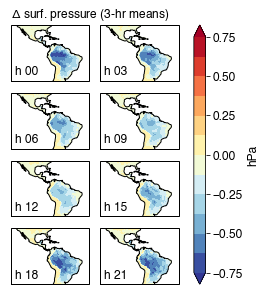

In [21]:
fontsize=12

fig = mp.figure(figsize=(3.25,4))

y_zero = numpy.zeros(xlong.shape[1])
#levels = numpy.arange(-100,101,20)
levels = numpy.arange(-0.75,0.76,0.125)

xticks_deg_E=numpy.array((250,300,325))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1, projection=cartopy.crs.PlateCarree())
    ax.set_extent([xlong.min()+25., xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax.coastlines(resolution='110m')
    
    contour_plot = ax.contourf(xlong[0,:],xlat[:,0],psfc_diffs_landmask[t,:,:],cmap='RdYlBu_r',levels=levels,extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.text(s='h '+hour_strings[t], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

# ('+string.ascii_lowercase[t]+') 
fig.tight_layout(w_pad=-2.5, h_pad=0.5)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1-0.03, bottom_pos.y0, 0.05, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('hPa', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-50,451,50))

ax_list[0].text(s='$\Delta$ surf. pressure (3-hr means)', x=0, y=1.04, transform=ax_list[0].transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.savefig('figureXX_PSFC_change_map.png', dpi=600, bbox_inches='tight', transparent=True)

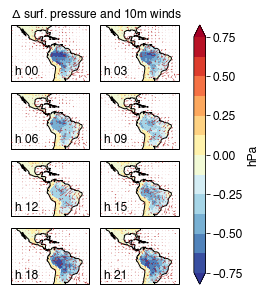

In [22]:
fontsize=12

every_nth_lat=10
every_nth_lon=10
quiver_scale = 0.05 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 0.5
quiver_key_scale = 5
quiver_color = 'firebrick'

fig = mp.figure(figsize=(3.25,4))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.75,0.76,0.125)

xticks_deg_E=numpy.array((250,300,325))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1, projection=cartopy.crs.PlateCarree())
    ax.set_extent([xlong.min()+25., xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax.coastlines(resolution='110m')
    
    contour_plot = ax.contourf(xlong[0,:],xlat[:,0],psfc_diffs_landmask[t,:,:],cmap='RdYlBu_r',levels=levels,extend='both')
    
    ax.quiver(xlong[0,:][::every_nth_lon]+360.,xlat[:,0][::every_nth_lat],\
              u10_diffs[t][::every_nth_lat,::every_nth_lon],\
              v10_diffs[t][::every_nth_lat,::every_nth_lon],\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, width=quiver_shaft_width)
    
    
    ax.tick_params(labelsize=fontsize)
    ax.text(s='h '+hour_strings[t], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

# ('+string.ascii_lowercase[t]+') 
fig.tight_layout(w_pad=-2.5, h_pad=0.5)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1-0.03, bottom_pos.y0, 0.05, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('hPa', fontsize=fontsize)

ax_list[0].text(s='$\Delta$ surf. pressure and 10m winds', x=0, y=1.04, transform=ax_list[0].transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.savefig('figureXX_PSFC_and_10m_WIND_change_map.png', dpi=600, bbox_inches='tight', transparent=True)

# plev uv winds

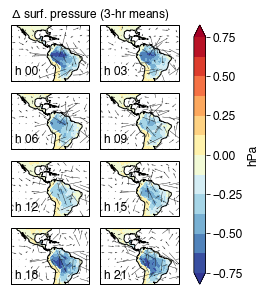

In [23]:
fontsize=12

every_nth_lat=20
every_nth_lon=20
quiver_scale = 0.025 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 5.#.75
quiver_key_scale = 5
quiver_color = '0.1'

fig = mp.figure(figsize=(3.25,4))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.75,0.76,0.125)

xticks_deg_E=numpy.array((250,300,325))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1, projection=cartopy.crs.PlateCarree())
    ax.set_extent([xlong.min()+25., xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax.coastlines(resolution='110m')
    
    contour_plot = ax.contourf(xlong[0,:],xlat[:,0],psfc_diffs_landmask[t,:,:],cmap='RdYlBu_r',levels=levels,extend='both')
    
    ax.quiver(xlong[0,:][::every_nth_lon]+360.,xlat[:,0][::every_nth_lat],\
              uplev_diffs[t][::every_nth_lat,::every_nth_lon],\
              vplev_diffs[t][::every_nth_lat,::every_nth_lon],\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3)
    
    
    ax.tick_params(labelsize=fontsize)
    ax.text(s='h '+hour_strings[t], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

# ('+string.ascii_lowercase[t]+') 
fig.tight_layout(w_pad=-2.5, h_pad=0.5)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1-0.03, bottom_pos.y0, 0.05, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('hPa', fontsize=fontsize)

ax_list[0].text(s='$\Delta$ surf. pressure (3-hr means)', x=0, y=1.04, transform=ax_list[0].transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.savefig('figureXX_PSFC_and_850hPa_WIND_change_map.png', dpi=600, bbox_inches='tight', transparent=True)

# calculate divergence

In [24]:
dudx_400_array = numpy.array(([numpy.gradient(u_lowlevel_400_array[t,:,:], 50000., axis=1) for t in range(8)]))
dvdy_400_array = numpy.array(([numpy.gradient(v_lowlevel_400_array[t,:,:], 50000., axis=0) for t in range(8)]))

dudx_1000_array = numpy.array(([numpy.gradient(u_lowlevel_1000_array[t,:,:], 50000., axis=1) for t in range(8)]))
dvdy_1000_array = numpy.array(([numpy.gradient(v_lowlevel_1000_array[t,:,:], 50000., axis=0) for t in range(8)]))

div_400_array = -(dudx_400_array+dvdy_400_array)
div_1000_array = -(dudx_1000_array+dvdy_1000_array)

div_diffs_array = div_1000_array-div_400_array

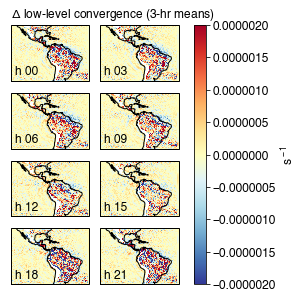

In [25]:
fontsize=12

every_nth_lat=20
every_nth_lon=20
quiver_scale = 0.025 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 5.#.75
quiver_key_scale = 5
quiver_color = '0.1'

fig = mp.figure(figsize=(3.25,4))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-2e-6,2.1e-6,0.2e-6)

xticks_deg_E=numpy.array((250,300,325))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1, projection=cartopy.crs.PlateCarree())
    ax.set_extent([xlong.min()+25., xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax.coastlines(resolution='110m')
    
    #contour_plot = ax.contourf(xlong[0,:],xlat[:,0],div_diffs_array[t,:,:],cmap='RdYlBu_r',levels=levels,extend='both')
    contour_plot = ax.pcolormesh(xlong[0,:],xlat[:,0],div_diffs_array[t,:,:],cmap='RdYlBu_r',vmin=-2e-6,vmax=2e-6)#,snap=True)
#     ax.quiver(xlong[0,:][::every_nth_lon]+360.,xlat[:,0][::every_nth_lat],\
#               uplev_diffs[t][::every_nth_lat,::every_nth_lon],\
#               vplev_diffs[t][::every_nth_lat,::every_nth_lon],\
#               units='xy', scale=quiver_scale, \
#               color=quiver_color, zorder=3)
    
    
    ax.tick_params(labelsize=fontsize)
    ax.text(s='h '+hour_strings[t], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

# ('+string.ascii_lowercase[t]+') 
fig.tight_layout(w_pad=-2.5, h_pad=0.5)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1-0.03, bottom_pos.y0, 0.05, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('s$^{\,-1}$', fontsize=fontsize)

ax_list[0].text(s='$\Delta$ low-level convergence (3-hr means)', x=0, y=1.04, transform=ax_list[0].transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.savefig('figureXX_DIVERGENCE_change_map.png', dpi=600, bbox_inches='tight', transparent=True)